# Module 10: Logscale

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss
import vega_datasets
%matplotlib inline

## Ratio and logarithm

If you use linear scale to visualize ratios, it can be quite misleading.

Let's first create some ratios.

In [2]:
x = np.array([1,    1,   1,  1, 10, 100, 1000])
y = np.array([1000, 100, 10, 1, 1,  1,   1   ])
ratio = x/y
print(ratio)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


**Q: Plot on the linear scale using the [`scatter()`](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) function. Also draw a horizontal line at ratio=1 for a reference. **

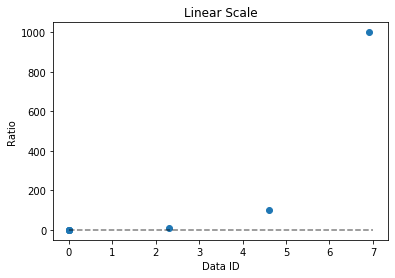

In [3]:
plt.scatter(np.log(x),ratio)
plt.xlabel('Data ID')
plt.ylabel('Ratio')
plt.title('Linear Scale')
plt.hlines(y=1,xmin=0,xmax=7,linestyles='dashed',alpha=.5)

**Q: Explain what's bad about this plot.**

Linear scale graph will exaggerate the increase in y-axis, even though the ratio is actually constant, therefore it's misleading by distorting the comparisons.

**Q: Can you fix it? **

Text(0.5, 1.0, 'Log Scale')

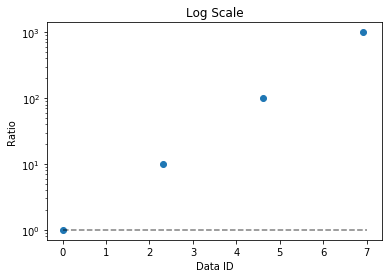

In [4]:
# Implement
plt.scatter(np.log(x),ratio)
plt.xlabel('Data ID')
plt.ylabel('Ratio')
plt.yscale('log')
plt.hlines(y=1,xmin=0,xmax=7,linestyles='dashed',alpha=.5)
plt.title('Log Scale')

## Log-binning

Let's first see what happens if we do not use the log scale for a dataset with a heavy tail. 

**Q: Load the movie dataset from `vega_datasets` and remove the NaN rows based on the following three columns: `IMDB_Rating`, `IMDB_Votes`, `Rotten_Tomatoes_Rating`. **

In [5]:
# Implement
movies = vega_datasets.data.movies()
movies = movies.dropna(subset=['IMDB_Rating','Rotten_Tomatoes_Rating','IMDB_Votes'],axis=0)

If you simply call `hist()` method with a dataframe object, it identifies all the numeric columns and draw a histogram for each. 

**Q: draw all possible histograms of the movie dataframe. Adjust the size of the plots if needed. **

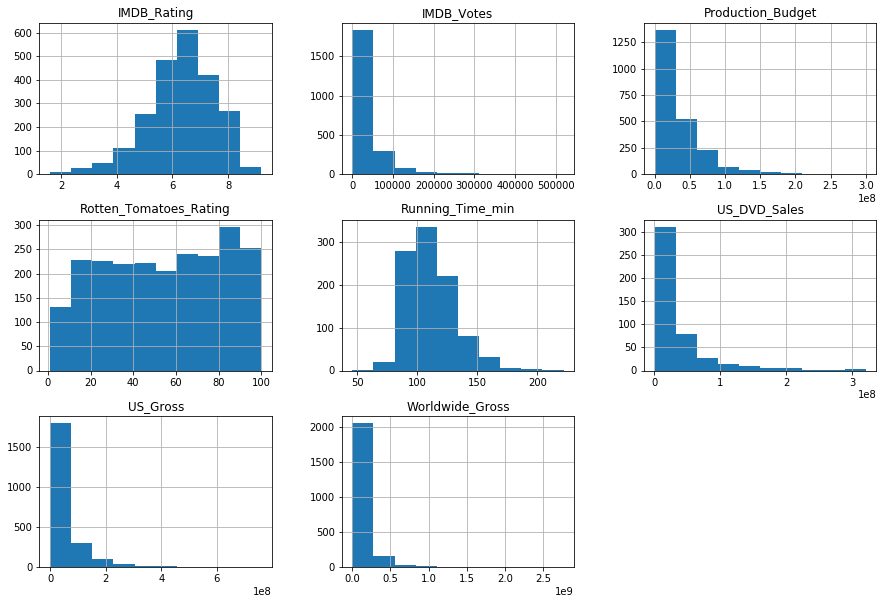

In [6]:
# Implement
movies.hist(figsize=(15,10))
plt.show()

As we can see, a majority of the columns are not normally distributed. In particular, if you look at the worldwide gross variable, you only see a couple of meaningful data from the histogram. Is this a problem of resolution? How about increasing the number of bins?

**Q: Play with the number of bins, and then increase the number of bins to 200. **

Text(0, 0.5, 'Frequency')

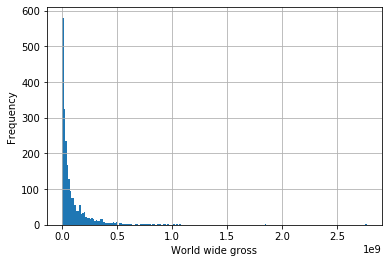

In [7]:
# Implement
movies['Worldwide_Gross'].hist(bins=200)
plt.xlabel('World wide gross')
plt.ylabel('Frequency')

Maybe a bit more useful, but it doesn't tell anything about the data distribution above certain point. 

**Q: How about changing the vertical scale to logarithmic scale?**

Text(0, 0.5, 'Frequency')

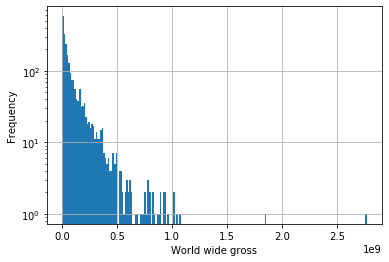

In [8]:
# Implement
movies['Worldwide_Gross'].hist(bins=200)
plt.yscale('log')
plt.xlabel('World wide gross')
plt.ylabel('Frequency')

Now, let's try log-bin. Recall that when plotting histgrams we can specify the edges of bins through the `bins` parameter. For example, we can specify the edges of bins to [1, 2, 3, ... , 10] as follows.


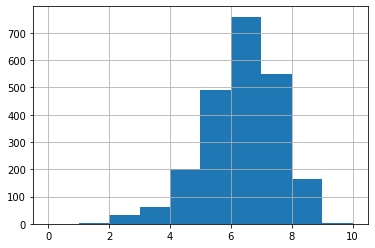

In [9]:
movies.IMDB_Rating.hist(bins=range(0,11))

Here, we can specify the edges of bins in a similar way. Instead of specifying on the linear scale, we do it on the log space. Some useful resources:

* [Google query: python log-bin](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=python+log-bin&pws=0)
* [numpy.logspace](http://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html)
* [numpy.linspace vs numpy.logspace](http://stackoverflow.com/questions/31480033/difference-in-output-between-numpy-linspace-and-numpy-logspace)

Hint: since $10^{\text{start}} = \text{min(Worldwide_Gross)}$, $\text{start} = \log_{10}(\text{min(Worldwide_Gross)})$

In [10]:
min(movies.Worldwide_Gross)

0.0

Because there seems to be movie(s) that made $0, and because log(0) is undefined & log(1) = 0, let's add 1 to the variable.  

In [11]:
movies.Worldwide_Gross = movies.Worldwide_Gross+1.0

**Q: now create logarithmic bins. Create 20 bins from the minimum value to the maximum value.**

In [12]:
# Implement
logbins = np.logspace(np.log10(min(movies.Worldwide_Gross)),np.log10(max(movies.Worldwide_Gross)),20)
logbins

array([1.00000000e+00, 3.14018485e+00, 9.86076088e+00, 3.09646119e+01,
       9.72346052e+01, 3.05334634e+02, 9.58807191e+02, 3.01083182e+03,
       9.45456845e+03, 2.96890926e+04, 9.32292387e+04, 2.92757043e+05,
       9.19311230e+05, 2.88680720e+06, 9.06510822e+06, 2.84661155e+07,
       8.93888645e+07, 2.80697558e+08, 8.81442219e+08, 2.76789150e+09])

Now we can plot a histgram with log-bin. Set both axis to be log-scale. 

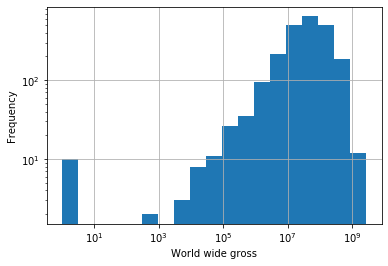

In [13]:
movies['Worldwide_Gross'].hist(bins=logbins)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('World wide gross')
plt.ylabel('Frequency')
plt.show()

What is going on? Is this the right plot?

**Q: Can you explain the plot? Why are there gaps?**
Gaps appear because the bin width isn't normalize.

**Q: explain and fix**
I feel like the x-axis shouldn't be log scale, because in this case the linear scale is readable and easier to understand, so the best option should use semilog scale with log bins, this way we can clearly see the distribution and have understanding of its values.

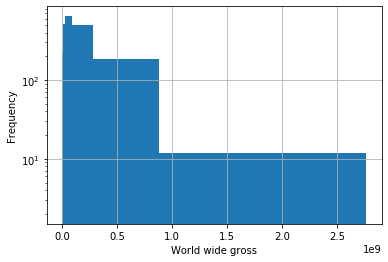

In [26]:
movies['Worldwide_Gross'].hist(bins=logbins)
plt.xlabel('World wide gross')
plt.yscale('log')
plt.ylabel('Frequency')
plt.show()

## CCDF

CCDF is a nice alternative to examine distributions with heavy tails. The idea is same as CDF, but the direction of aggregation is opposite. We have done CDF before. It's just a small change to that code. 

**Q: Draw a CCDF in log-log scale**

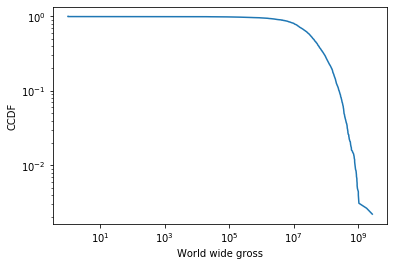

In [15]:
# implement 
sorted_value = np.sort(movies['Worldwide_Gross']) 
ccdf = np.linspace(1, 1/len(movies['Worldwide_Gross']), len(movies['Worldwide_Gross']))
plt.plot(sorted_value, ccdf)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('World wide gross')
plt.ylabel('CCDF')
plt.show()

We can also try in semilog scale (only one axis is in a log-scale), where the horizontal axis is linear. 

**Q: Draw a CCDF in semilog scale**

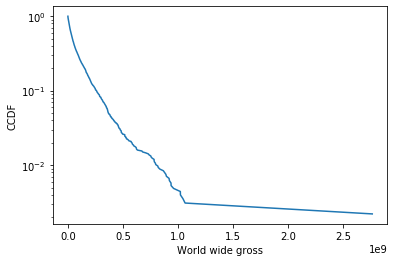

In [16]:
# Implement
sorted_value = np.sort(movies['Worldwide_Gross']) 
ccdf = np.linspace(1, 1/len(movies['Worldwide_Gross']), len(movies['Worldwide_Gross']))
plt.plot(sorted_value, ccdf)
plt.yscale('log')
plt.xlabel('World wide gross')
plt.ylabel('CCDF')
plt.show()

A straight line in semilog scale means exponential decay (cf. a straight line in log-log scale means power-law decay). So it seems like the amount of money a movie makes across the world follows *roughly* an exponential distribution, while there are some outliers that make insane amount of money. 

**Q: Which is the most successful movie in our dataset?**

You can use the following

- `idxmax()`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.idxmax.html
- `loc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html or `iloc`: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html 

Which one should you use, `loc` or `iloc`? How are they different from each other?

In [17]:
# Implement
# idxmax gets index label
# loc gets the row which uses label value as index
# iloc gets the row which uses label value as index number
label = movies['Worldwide_Gross'].idxmax()
movies.loc[label]

Title                                  Avatar
US_Gross                          7.60168e+08
Worldwide_Gross                   2.76789e+09
US_DVD_Sales                      1.46154e+08
Production_Budget                    2.37e+08
Release_Date                      Dec 18 2009
MPAA_Rating                             PG-13
Running_Time_min                          NaN
Distributor                  20th Century Fox
Source                    Original Screenplay
Major_Genre                            Action
Creative_Type                 Science Fiction
Director                        James Cameron
Rotten_Tomatoes_Rating                     83
IMDB_Rating                               8.3
IMDB_Votes                             261439
Name: 1234, dtype: object